# Juliaで画像をドット絵化！
> Juliaで画像をdot絵化します。k-meansを用いて少ない色で画像を表現します。

- toc: true 
- badges: true
- comments: true
- categories: [JuliaLang, image, ML]
- image: images/dot-icon.png

今回は, Juliaを使って画像をドット絵に変換していきたいと思います。

ドット絵は少ない色とピクセルでイラストを表現する技法です。

そのため、リアルなドット絵に変換するには、単に画像を小さくリサイズするだけでなく、色を削減する必要があります。

となると「代表的な色」で多くの色を表現するわけですが、ここではその「代表的な色」を決めるためにk-meansを用います。

k-meansそのものについては https://qiita.com/g-k/items/0d5d22a12a4507ecbf11　などを参照してください。

Juliaでは、Clustering.jlのkmeans()を用いることなどで利用できます。

実装に関してですが、特別難しいことはしておらず、
単に

resize => k-meansによる減色

を行っているだけです。

注意点として、Images.jlなどの画像表現は通常の三次元配列などではなく、RGBを表現するための(他言語と比べて)特殊な型を用いているので、それらと変換するような関数 `img_to_arr`  を用いました。(個人的に気持ち悪いな〜と思っているのでもしかしたら間違っているかもしれないです.その際はTwitterなどに連絡をくださると嬉しいです。。。。)

In [1]:
using Images
using Clustering
using Random
using Plots

In [2]:
function img_to_arr(img)
    return convert(Array{Float64}, channelview(img))
end

img_to_arr (generic function with 1 method)

In [3]:
function plot_img(img)
    plot(colorview(RGB, img))
end

plot_img (generic function with 1 method)

In [4]:
img = load("img.jpg");

In [5]:
size(img)

(198, 198)

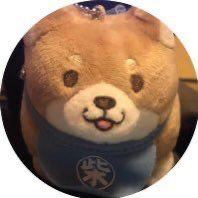

In [6]:
img

In [7]:
using Clustering

In [8]:
function pixel(img; n_color=10, w=64, h=64)
    img = imresize(img, (w, h))
    img = reshape(img_to_arr(img), (3, :))
    color_class = kmeans(img, n_color)
    img = hcat((x -> color_class.centers[:, x]).(color_class.assignments)...)
    return reshape(img, (3, w, h))
end

pixel (generic function with 1 method)

In [9]:
result = pixel(img, n_color=5, w=64, h=64);

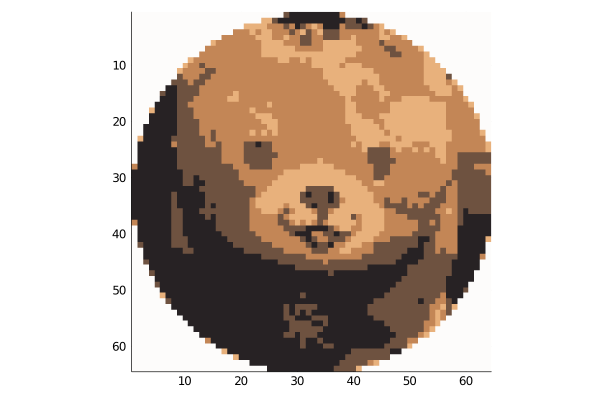

In [10]:
plot_img(result)

無事にドット絵を生成できました！

##  おまけ

概念

In [21]:
result = pixel(img, n_color=2, w=4, h=4);

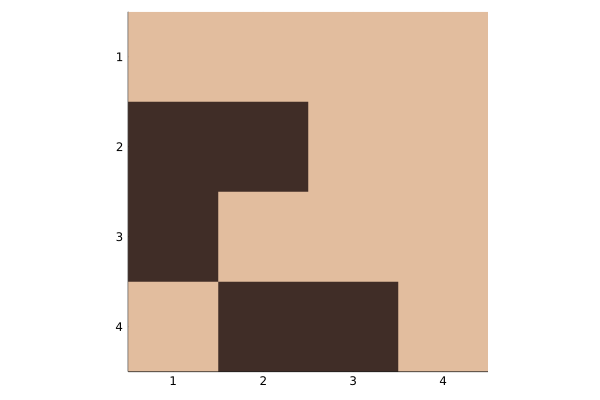

In [22]:
plot_img(result)